In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import os

from sklearn.metrics import log_loss, accuracy_score

import ast

from scipy.stats import wilcoxon, ttest_rel
from adjustText import adjust_text

In [2]:
datasets = set(x.split('_')[0] for x in os.listdir('single_pass_vs_tree'))

print('Dataset \t\t\t\t Tree+Transform  \t\t Transform ')
print('-'*85)

tree_accs = []
transform_accs = []
tree_shaps = []
transform_shaps = []

latex_table = ''
latex_table += '\\begin{table}\n'
latex_table += '\t\\centering\n'
latex_table += '\t\\begin{tabular}{c|c|c|c|c}\n'
latex_table += '\t\t\\textbf{name} & \\textbf{acc (D)} & \\textbf{$|\\bm{S}|$ (D)} & \\textbf{acc (I)} & \\textbf{$|\\bm{S}|$ (I)} \\\\ \hline \hline \n'

latex_table_row = '\t\t {} & {} & {} & {} & {} \\\\ \hline \n' 
for dataset in datasets:
    #if dataset == 'Beef': continue
    ground_truth = pd.read_csv('../pyshapelets/data/partitioned/{}/{}_test.csv'.format(dataset, dataset))['target']
    
    tree_shapelets = open('single_pass_vs_tree/{}_shaps_tree.txt'.format(dataset), 'r').readlines()
    transform_shapelets = open('single_pass_vs_tree/{}_shaps_transform.txt'.format(dataset), 'r').readlines()
    
    tree_shapelets_vectors = []
    for shap in tree_shapelets:
        tree_shapelets_vectors.append(ast.literal_eval(shap))
    
    transform_shapelets_vectors = []
    for shap in transform_shapelets:
        transform_shapelets_vectors.append(ast.literal_eval(shap))
    
    map_dict = {}
    for j, c in enumerate(np.unique(ground_truth)):
        map_dict[c] = j
    ground_truth = ground_truth.map(map_dict)
    
    rf_tree = pd.read_csv('single_pass_vs_tree/{}_rf_preds_tree.csv'.format(dataset)).drop('Unnamed: 0', axis=1)
    rf_transform = pd.read_csv('single_pass_vs_tree/{}_rf_preds_transform.csv'.format(dataset)).drop('Unnamed: 0', axis=1)
    
    
    
    tree_acc = accuracy_score(ground_truth, np.argmax(rf_tree.values, axis=1))
    transform_acc = accuracy_score(ground_truth, np.argmax(rf_transform.values, axis=1))
    if tree_acc > transform_acc:
        latex_table += latex_table_row.format(
            dataset,
            '\\textbf{'+str(np.round(tree_acc, 2))+'}',
            '\\textbf{'+str(len(tree_shapelets))+'}',
            np.round(transform_acc, 2),
            len(transform_shapelets),
        )
    elif tree_acc < transform_acc:
        latex_table += latex_table_row.format(
            dataset,
            np.round(tree_acc, 2),
            len(tree_shapelets),
            '\\textbf{'+str(np.round(transform_acc, 2))+'}',
            '\\textbf{'+str(len(transform_shapelets))+'}',
        )
    else:
        latex_table += latex_table_row.format(
            dataset,
            np.round(tree_acc, 2),
            len(tree_shapelets),
            np.round(transform_acc, 2),
            len(transform_shapelets),
        )
    
    print(
        dataset, '\t\t' + '\t'*(len(dataset) < 25) + '\t'*(len(dataset) < 15) + '\t'*(len(dataset) < 7),
        np.round(accuracy_score(ground_truth, np.argmax(rf_tree.values, axis=1)), 2), len(tree_shapelets), '\t\t\t', 
        np.round(accuracy_score(ground_truth, np.argmax(rf_transform.values, axis=1)), 2), len(transform_shapelets)
    )
    
    tree_accs.append(accuracy_score(ground_truth, np.argmax(rf_tree.values, axis=1)))    
    tree_shaps.append(len(tree_shapelets))
    transform_accs.append(accuracy_score(ground_truth, np.argmax(rf_transform.values, axis=1)))
    transform_shaps.append(len(transform_shapelets))

latex_table += '\t\\end{tabular}\n'
latex_table += '\\end{table}\n'
print(latex_table)
    

print(wilcoxon(tree_accs, transform_accs))
print(ttest_rel(tree_accs, transform_accs))

"""
TO CHECK:

* MoteStrain
* Coffee
* ArrowHead
----
* GunPoint
* ECG2200
"""

Dataset 				 Tree+Transform  		 Transform 
-------------------------------------------------------------------------------------
ShapeletSim 				 1.0 1 			 1.0 28
MiddlePhalanxOutlineAgeGroup 		 0.59 27 			 0.46 40
GunPoint 				 0.95 1 			 0.99 75
MedicalImages 				 0.68 53 			 0.64 49
MoteStrain 				 0.79 2 			 0.87 42
DiatomSizeReduction 			 0.8 3 			 0.85 78
SonyAIBORobotSurface2 			 0.86 2 			 0.8 32
Coffee 					 0.82 1 			 0.89 143
Symbols 				 0.91 5 			 0.87 199
ItalyPowerDemand 			 0.93 3 			 0.92 12
SyntheticControl 			 0.9 11 			 0.84 30
SonyAIBORobotSurface1 			 0.72 1 			 0.65 35
FacesUCR 				 0.73 38 			 0.66 65
ToeSegmentation2 			 0.76 3 			 0.75 118
DistalPhalanxOutlineAgeGroup 		 0.73 20 			 0.75 40
Lightning7 				 0.66 13 			 0.66 146
ToeSegmentation1 			 0.93 1 			 0.93 138
ArrowHead 				 0.66 2 			 0.75 125
TwoLeadECG 				 0.95 1 			 0.97 41
ProximalPhalanxOutlineAgeGroup 		 0.85 23 			 0.81 40
ECGFiveDays 				 0.99 1 			 0.99 68
CBF 					 0.95 2 			 0.93 64
ECG200 

'\nTO CHECK:\n\n* MoteStrain\n* Coffee\n* ArrowHead\n----\n* GunPoint\n* ECG2200\n'

/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


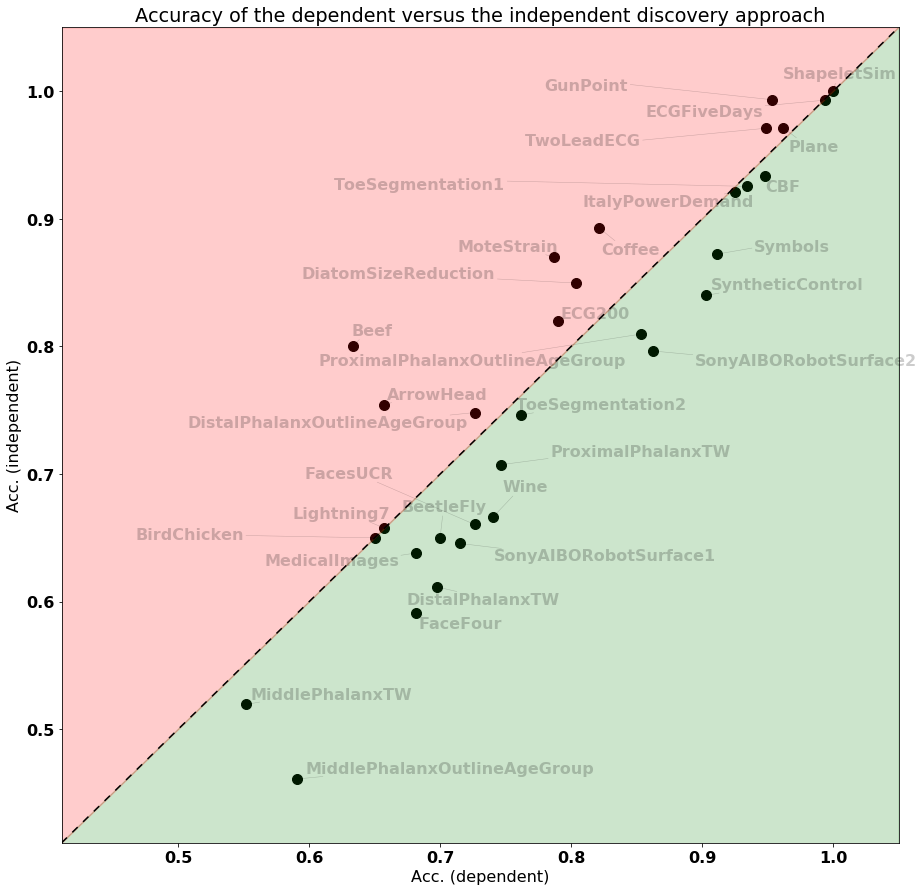

In [9]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 16}

plt.rc('font', **font)

plt.figure(figsize=(15,15))
plt.scatter(tree_accs, transform_accs, c='k', s=100)

limits = [min(tree_accs+transform_accs) - 0.05, max(tree_accs+transform_accs) + 0.05]
f = lambda x: x
range_x = np.linspace(limits[0], limits[1], 100)

plt.plot(range_x, f(range_x), dashes=[5,5], c='k')

plt.fill_between(range_x, f(range_x), alpha=0.2, color='g')
plt.fill_between(range_x, f(range_x), limits[1], alpha=0.2, color='r')

texts = []
for name, x, y in zip(datasets, tree_accs, transform_accs):
    texts.append(plt.annotate(name, (x, y), fontsize=16, alpha=0.2))

adjust_text(texts, only_move={'text': 'xy'}, arrowprops=dict(arrowstyle="-", color='k', lw=0.5, alpha=0.2))
    
plt.xlim(limits)
plt.ylim(limits)

plt.xlabel('Acc. (dependent)')
plt.ylabel('Acc. (independent)')

plt.title('Accuracy of the dependent versus the independent discovery approach')

plt.savefig('dep_vs_indep_acc.svg')

plt.show()

In [27]:
np.mean(transform_shaps), np.std(transform_shaps)

(83.28125, 60.2293711442972)

In [ ]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 16}

plt.rc('font', **font)

plt.figure(figsize=(10,10))
plt.scatter(tree_shaps, transform_shaps)

limits = [0, max(tree_shaps+transform_shaps) + 10]
f = lambda x: x
range_x = np.linspace(limits[0], limits[1], 100)

plt.plot(range_x, f(range_x), dashes=[5,5])

plt.fill_between(range_x, f(range_x), alpha=0.2, color='r')
plt.fill_between(range_x, f(range_x), limits[1], alpha=0.2, color='g')

for name, x, y in zip(datasets, tree_shaps, transform_shaps):
    plt.annotate(name, (x, y), fontsize=8, alpha=0.5)

plt.xlim(limits)
plt.ylim(limits)

plt.xlabel('#Shapelets (D)')
plt.ylabel('#Shapelets (I)')

plt.title('Dependent versus independent discovery: number of shapelets')

plt.savefig('dep_vs_indep_nr_shaps.svg')

plt.show()

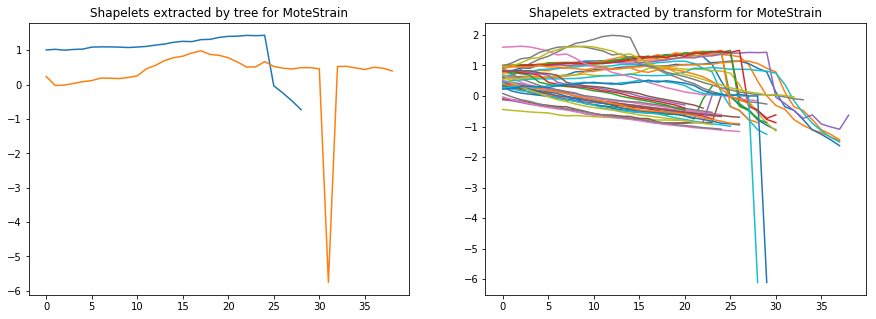

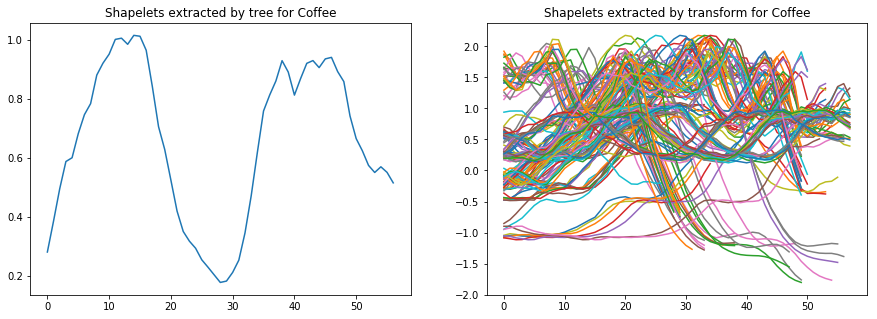

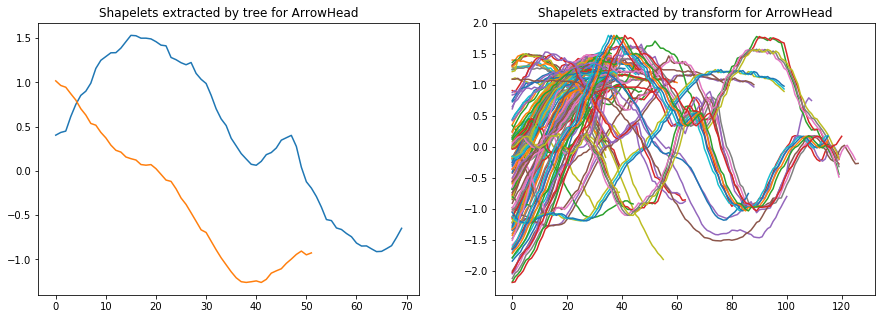

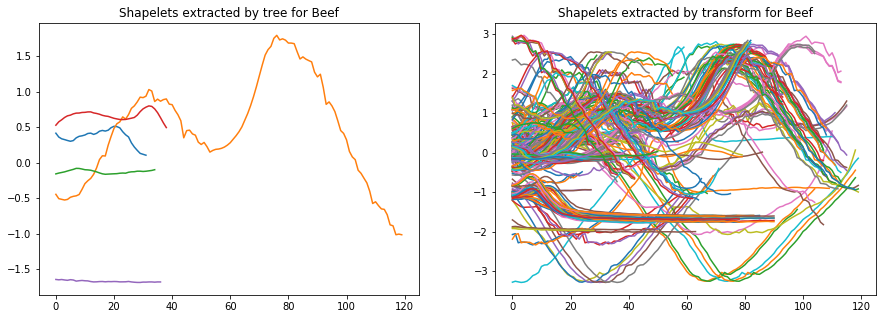

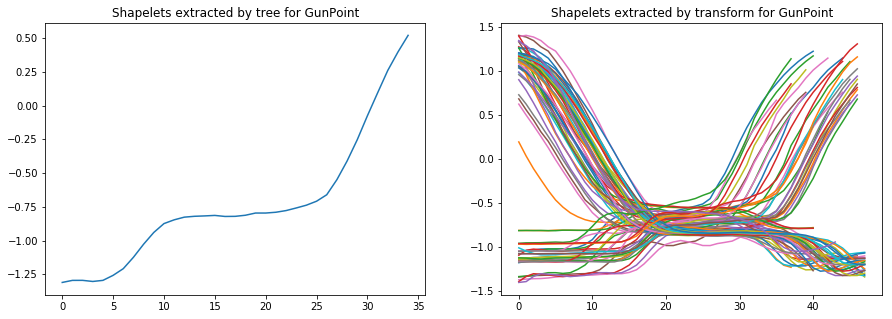

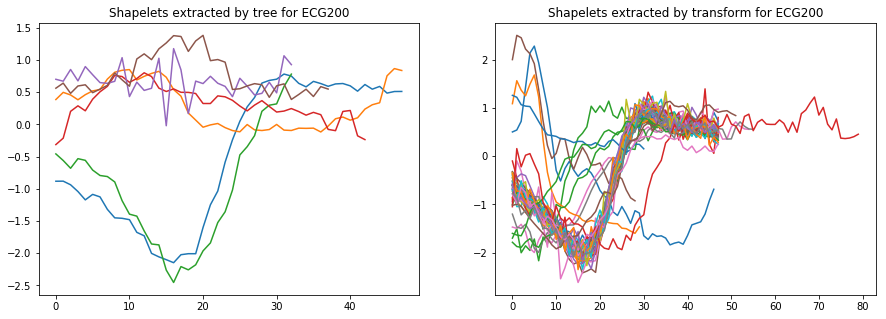

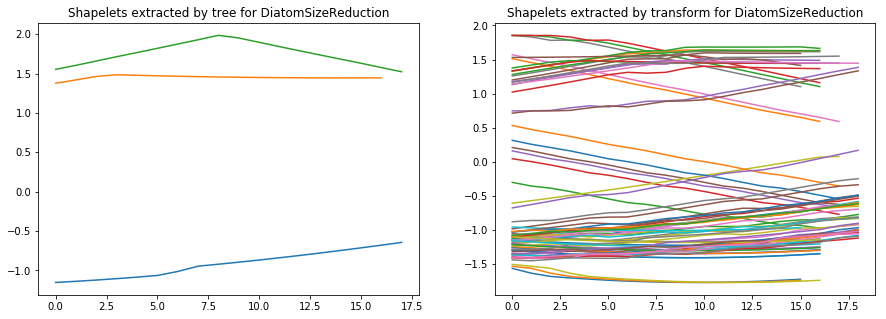

In [6]:
for dataset in ['DiatomSizeReduction', 'ArrowHead', 'Beef', 'MoteStrain', 'Coffee', 'GunPoint']:
    tree_shapelets = open('single_pass_vs_tree/{}_shaps_tree.txt'.format(dataset), 'r').readlines()
    transform_shapelets = open('single_pass_vs_tree/{}_shaps_transform.txt'.format(dataset), 'r').readlines()
    
    tree_shapelets_vectors = []
    for shap in tree_shapelets:
        tree_shapelets_vectors.append(ast.literal_eval(shap))
    
    transform_shapelets_vectors = []
    for shap in transform_shapelets:
        transform_shapelets_vectors.append(ast.literal_eval(shap))
    
    plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)
    for shap in tree_shapelets_vectors:
        plt.plot(range(len(shap)), shap)
    plt.title('Shapelets extracted by tree for {}'.format(dataset))

    plt.subplot(1,2,2)
    for shap in transform_shapelets_vectors:
        plt.plot(range(len(shap)), shap)
    plt.title('Shapelets extracted by transform for {}'.format(dataset))

    plt.show()

/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


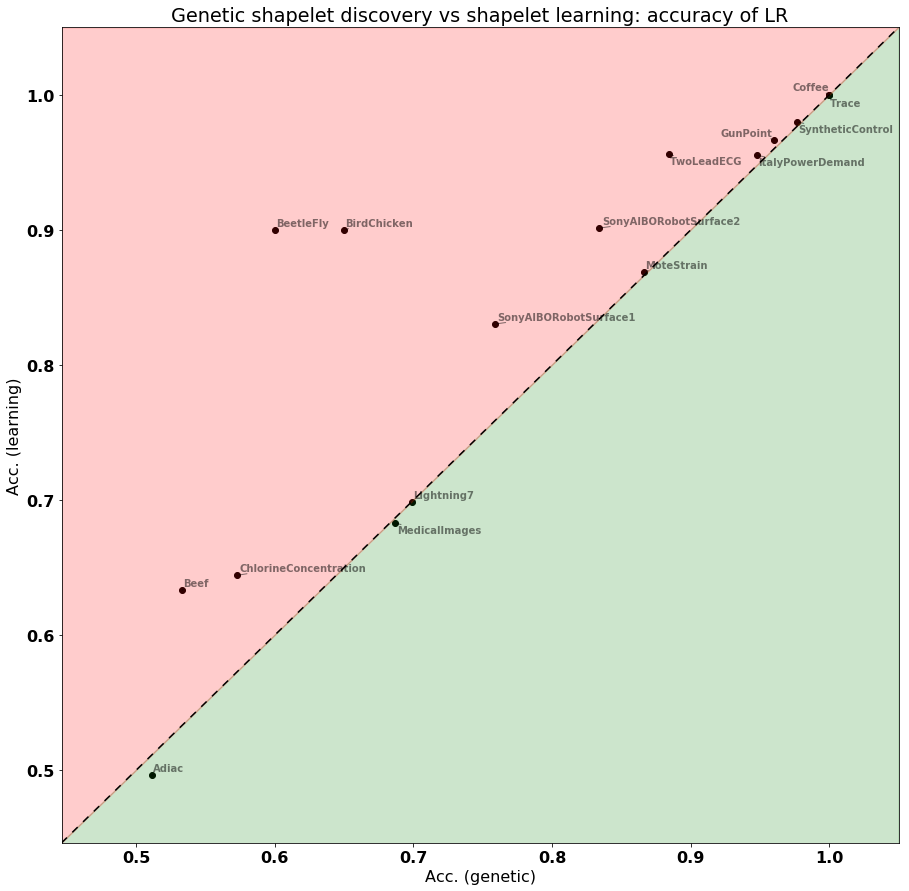

In [4]:
datasets = ['BeetleFly','Beef','Adiac','Coffee','BirdChicken','ChlorineConcentration','ItalyPowerDemand','GunPoint','Lightning7','MoteStrain','MedicalImages','SonyAIBORobotSurface1','SonyAIBORobotSurface2','TwoLeadECG','SyntheticControl','Trace']
genetic_accs = [0.6,0.533333333333333,0.51150895140665,1,0.65,0.572916666666667,0.947521865889213,0.96,0.698630136986301,0.866613418530351,0.686842105263158,0.75873544093178,0.834207764952781,0.884108867427568,0.976666666666667,1]
learning_accs = [0.9,0.633333333333333,0.49616368286445,1,0.9,0.644270833333333,0.955296404275996,0.966666666666667,0.698630136986301,0.869009584664537,0.682894736842105,0.830282861896838,0.901364113326338,0.956101843722564,0.98,1]

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 16}

plt.rc('font', **font)

plt.figure(figsize=(15,15))
plt.scatter(genetic_accs, learning_accs, c='k')

limits = [min(genetic_accs+learning_accs) - 0.05, max(genetic_accs+learning_accs) + 0.05]
f = lambda x: x
range_x = np.linspace(limits[0], limits[1], 100)

plt.plot(range_x, f(range_x), dashes=[5,5], c='k')

plt.fill_between(range_x, f(range_x), alpha=0.2, color='g')
plt.fill_between(range_x, f(range_x), limits[1], alpha=0.2, color='r')

texts = []
for name, x, y in zip(datasets, genetic_accs, learning_accs):
    texts.append(plt.annotate(name, (x, y), fontsize=10, alpha=0.5))

adjust_text(texts, only_move={'text': 'xy'}, arrowprops=dict(arrowstyle="-", color='k', lw=1.0, alpha=0.5))
    
plt.xlim(limits)
plt.ylim(limits)

plt.xlabel('Acc. (genetic)')
plt.ylabel('Acc. (learning)')

plt.title('Genetic shapelet discovery vs shapelet learning: accuracy of LR')

plt.savefig('gen_vs_lts_lr.svg')

plt.show()

# TODO: Use multiple measurements and take the mean
# TODO: Use different markers if there is statistical significance

/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


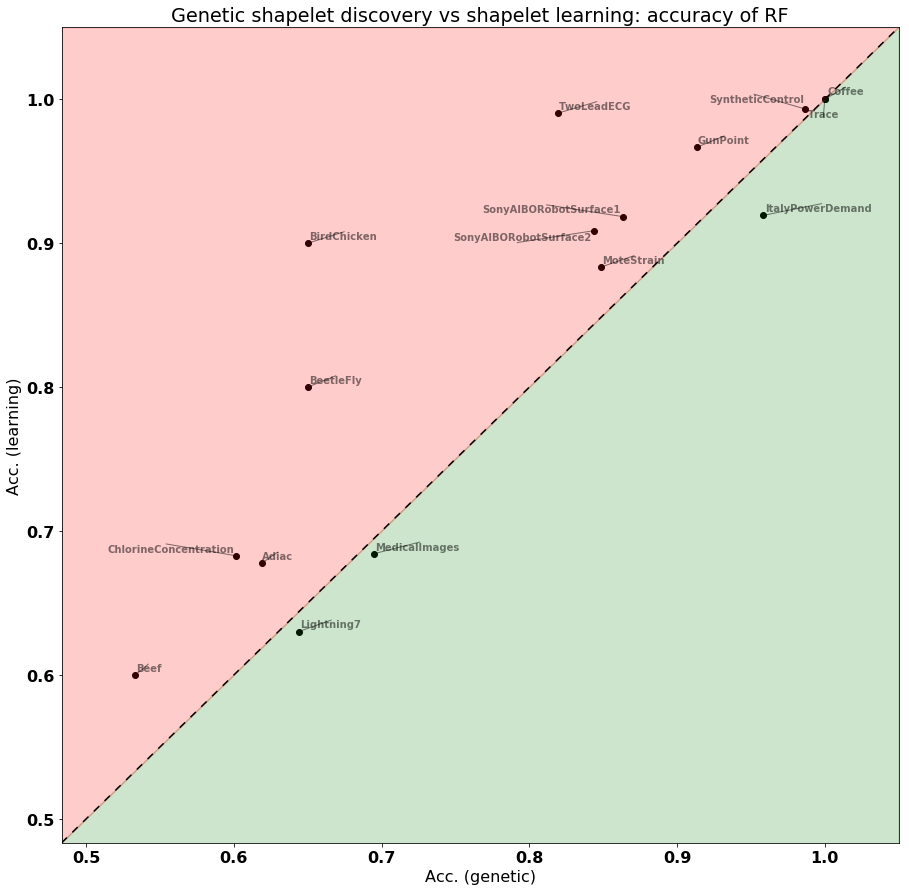

In [5]:
datasets = ['BeetleFly','Beef','Adiac','Coffee','BirdChicken','ChlorineConcentration','ItalyPowerDemand','GunPoint','Lightning7','MoteStrain','MedicalImages','SonyAIBORobotSurface1','SonyAIBORobotSurface2','TwoLeadECG','SyntheticControl','Trace']
genetic_accs = [0.65,0.533333333333333,0.618925831202046,1,0.65,0.6015625,0.95821185617104,0.913333333333333,0.643835616438356,0.848242811501597,0.694736842105263,0.863560732113145,0.843651626442812,0.819139596136962,0.986666666666667,1]
learning_accs = [0.8,0.6,0.677749360613811,1,0.9,0.6828125,0.919339164237124,0.966666666666667,0.63013698630137,0.883386581469648,0.68421052631579,0.91846921797005,0.908709338929696,0.990342405618964,0.993333333333333,1]

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 16}

plt.rc('font', **font)

plt.figure(figsize=(15,15))
plt.scatter(genetic_accs, learning_accs, c='k')

limits = [min(genetic_accs+learning_accs) - 0.05, max(genetic_accs+learning_accs) + 0.05]
f = lambda x: x
range_x = np.linspace(limits[0], limits[1], 100)

plt.plot(range_x, f(range_x), dashes=[5,5], c='k')

plt.fill_between(range_x, f(range_x), alpha=0.2, color='g')
plt.fill_between(range_x, f(range_x), limits[1], alpha=0.2, color='r')

texts = []
for name, x, y in zip(datasets, genetic_accs, learning_accs):
    texts.append(plt.annotate(name, (x, y), fontsize=10, alpha=0.5))

adjust_text(texts, only_move={'text': 'xy'}, arrowprops=dict(arrowstyle="-", color='k', lw=1.0, alpha=0.5))
    
plt.xlim(limits)
plt.ylim(limits)

plt.xlabel('Acc. (genetic)')
plt.ylabel('Acc. (learning)')

plt.title('Genetic shapelet discovery vs shapelet learning: accuracy of RF')

plt.savefig('gen_vs_lts_rf.svg')

plt.show()

# TODO: Use multiple measurements and take the mean
# TODO: Use different markers if there is statistical significance

/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


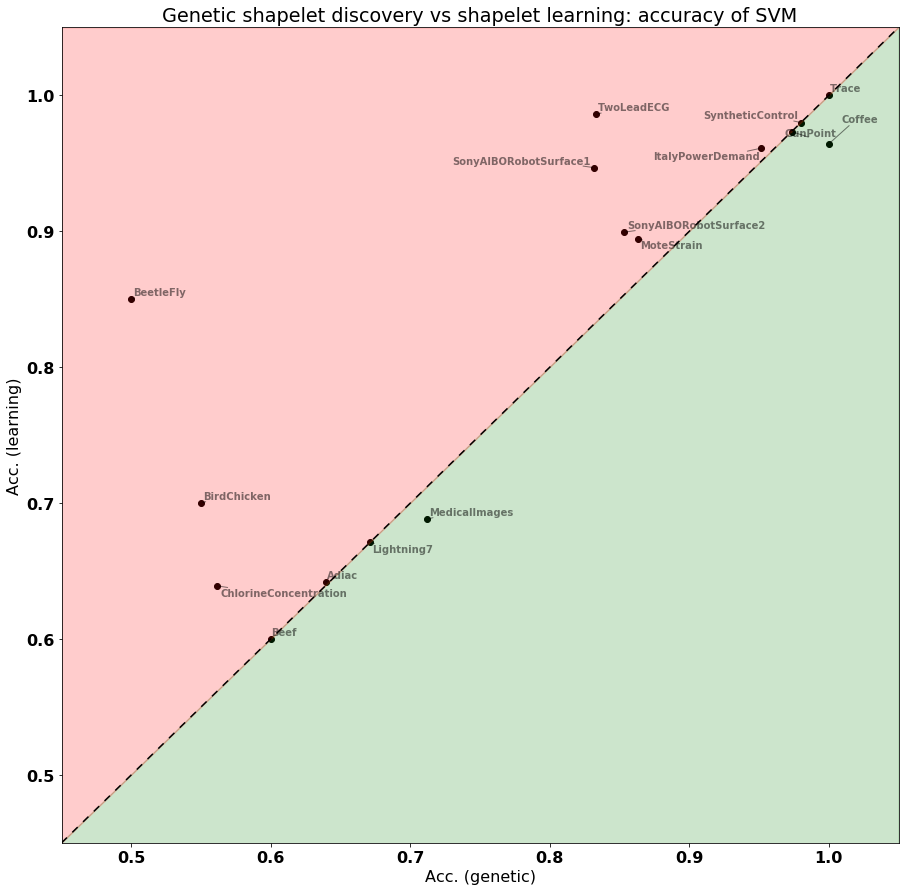

In [7]:
datasets = ['BeetleFly','Beef','Adiac','Coffee','BirdChicken','ChlorineConcentration','ItalyPowerDemand','GunPoint','Lightning7','MoteStrain','MedicalImages','SonyAIBORobotSurface1','SonyAIBORobotSurface2','TwoLeadECG','SyntheticControl','Trace']
genetic_accs = [0.5,0.6,0.639386189258312,1,0.55,0.56171875,0.951409135082604,0.973333333333333,0.671232876712329,0.863418530351438,0.711842105263158,0.831946755407654,0.853095487932844,0.833187006145742,0.98,1]
learning_accs = [0.85,0.6,0.641943734015345,0.964285714285714,0.7,0.6390625,0.961127308066084,0.973333333333333,0.671232876712329,0.894568690095847,0.688157894736842,0.94675540765391,0.899265477439664,0.98595258999122,0.98,1]

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 16}

plt.rc('font', **font)

plt.figure(figsize=(15,15))
plt.scatter(genetic_accs, learning_accs, c='k')

limits = [min(genetic_accs+learning_accs) - 0.05, max(genetic_accs+learning_accs) + 0.05]
f = lambda x: x
range_x = np.linspace(limits[0], limits[1], 100)

plt.plot(range_x, f(range_x), dashes=[5,5], c='k')

plt.fill_between(range_x, f(range_x), alpha=0.2, color='g')
plt.fill_between(range_x, f(range_x), limits[1], alpha=0.2, color='r')

texts = []
for name, x, y in zip(datasets, genetic_accs, learning_accs):
    texts.append(plt.annotate(name, (x, y), fontsize=10, alpha=0.5))

adjust_text(texts, only_move={'text': 'xy'}, arrowprops=dict(arrowstyle="-", color='k', lw=1.0, alpha=0.5))
    
plt.xlim(limits)
plt.ylim(limits)

plt.xlabel('Acc. (genetic)')
plt.ylabel('Acc. (learning)')

plt.title('Genetic shapelet discovery vs shapelet learning: accuracy of SVM')

plt.savefig('gen_vs_lts_svm.svg')

plt.show()

# TODO: Use multiple measurements and take the mean
# TODO: Use different markers if there is statistical significance